In [1]:
import numpy as np
from matplotlib import pyplot as plt

import cv2

In [89]:
def stitch(left_pts, right_pts, img_left, img_right):
    canvas_width = 7000
    canvas_height = 3024

    M = cv2.getPerspectiveTransform(right_pts, left_pts)
    warped_right = cv2.warpPerspective(img_right, M, (canvas_width, canvas_height))

    canvas = np.zeros_like(warped_right)
    canvas[:img_left.shape[0], :img_left.shape[1]] = img_left

    mask = np.any(warped_right != [0, 0, 0], axis=2)

    canvas[mask] = warped_right[mask]

    plt.figure(figsize=(20, 10))
    plt.imshow(canvas);

def stitch_cv2(img_left, img_right):
    stitcher = cv2.Stitcher_create()
    stitcher.setPanoConfidenceThresh(0)
    stitcher.setWaveCorrection(True)

    status, stitched = stitcher.stitch([img_left, img_right])

    # Check result
    if status == cv2.Stitcher_OK:
        print("Stitching succeeded!")
        plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
        # cv2.imwrite("stitched_result.jpg", stitched)
    else:
        print("Stitching failed. Error code:", status)

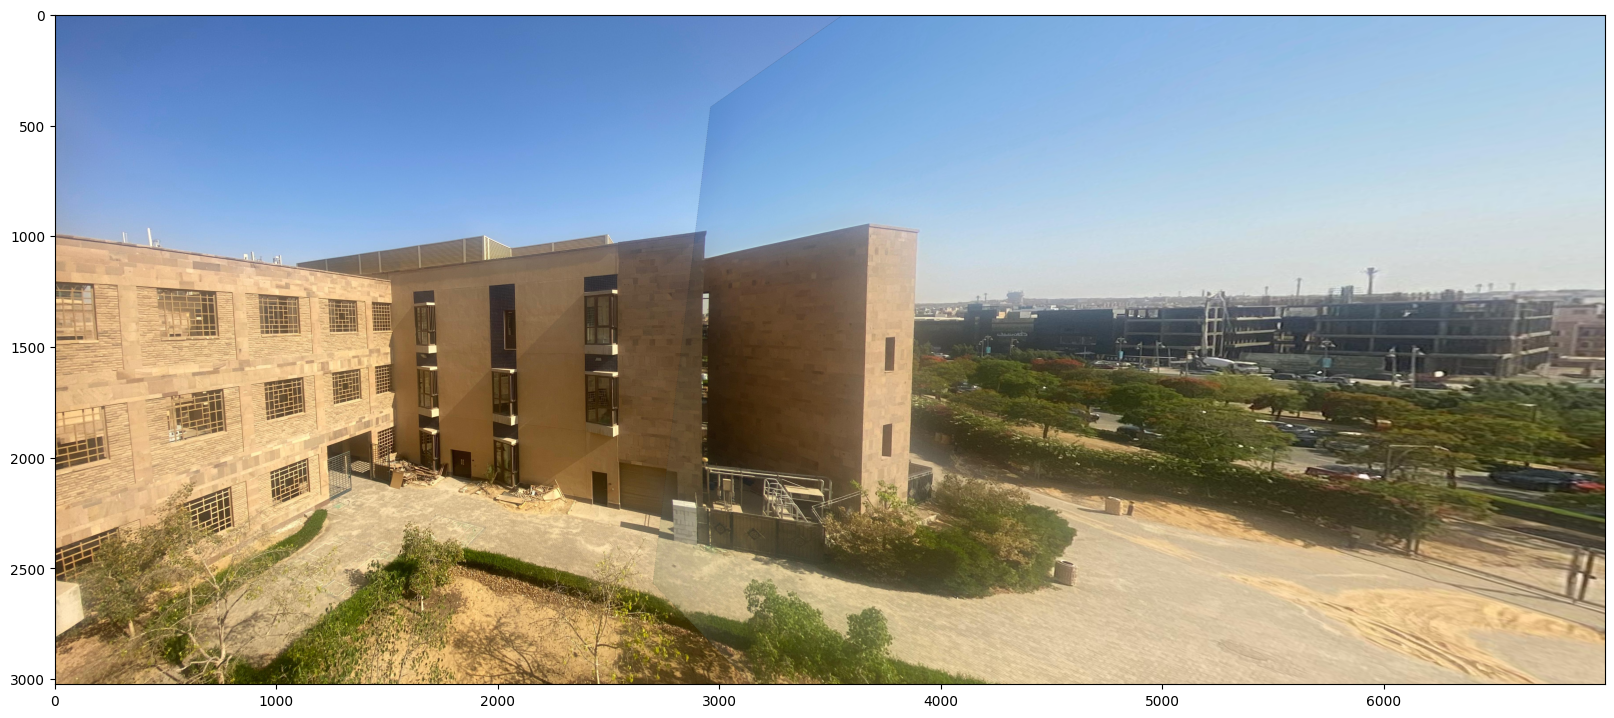

In [70]:
img_left = plt.imread('data/left_building.jpeg')
img_right = plt.imread('data/right_building.jpeg')

left_pts = np.array([
    [2953,1260],
    [3680,945],
    [3785,1615],
    [2945,1750]
], dtype=np.float32)

right_pts = np.array([
    [170,1165],
    [935,950],
    [1070,1515],
    [255,1790]
], dtype=np.float32)

stitch(left_pts, right_pts, img_left, img_right)

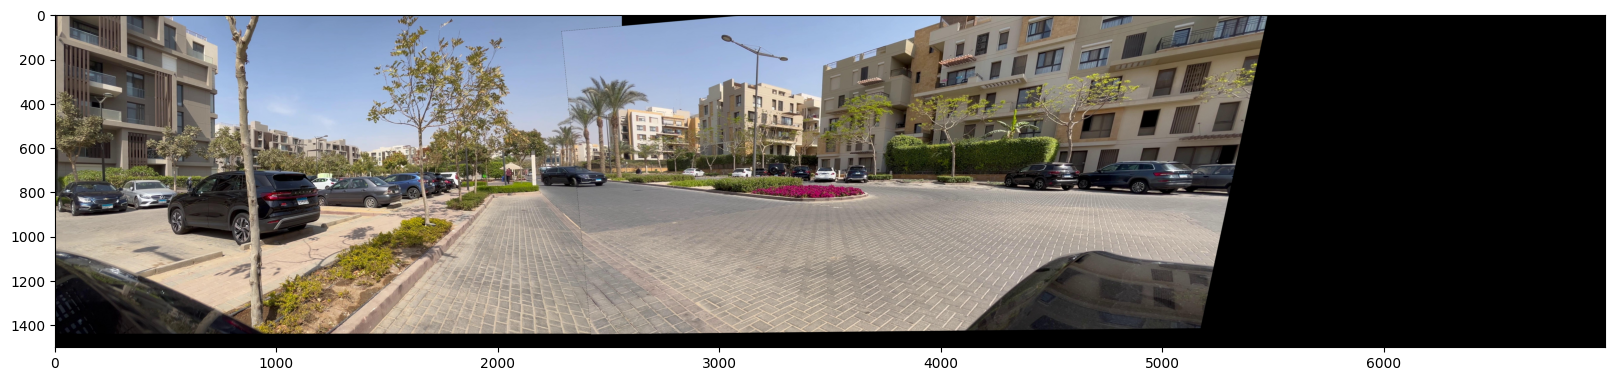

In [ ]:
img_left = plt.imread('data/left_street.jpeg')
img_right = plt.imread('data/right_street.jpeg')

left_pts = np.array([
    [2458,467],
    [2400,987],
    [2552,733],
    [2364,725]
], dtype=np.float32)

right_pts = np.array([
    [127,378],
    [24,913],
    [197,650],
    [13,632]
], dtype=np.float32)

stitch(left_pts, right_pts, img_left, img_right)

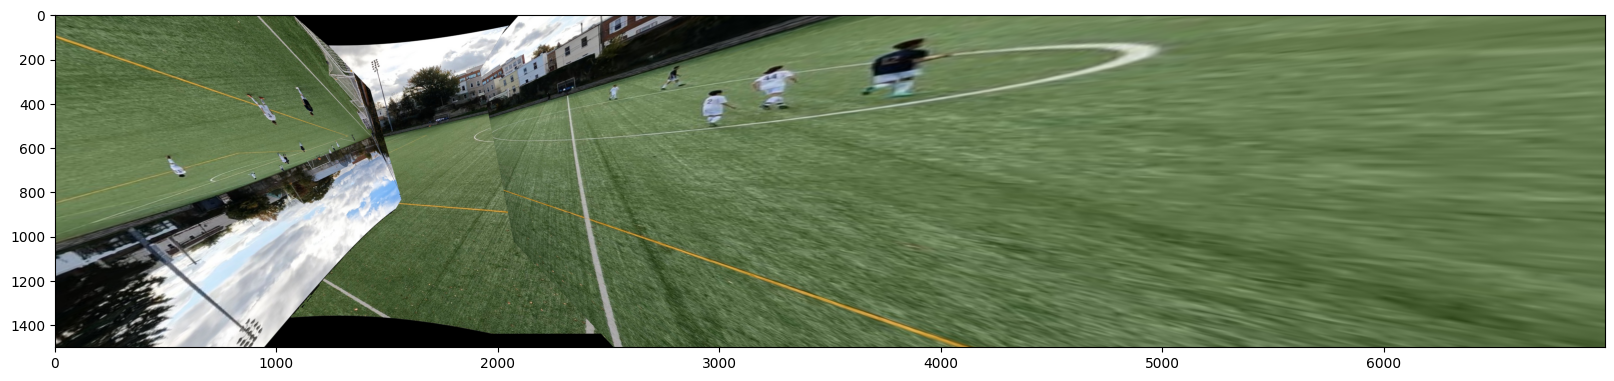

In [46]:
img_left = plt.imread('data/left_soccer.jpeg')
img_right = plt.imread('data/right_soccer.jpeg')

left_pts = np.array([
    [2228,354],
    [2466,401],
    [2132,571],
    [2403,921]
], dtype=np.float32)

right_pts = np.array([
    [472,394],
    [615,493],
    [327,577],
    [546,901]
], dtype=np.float32)

stitch(left_pts, right_pts, img_left, img_right)

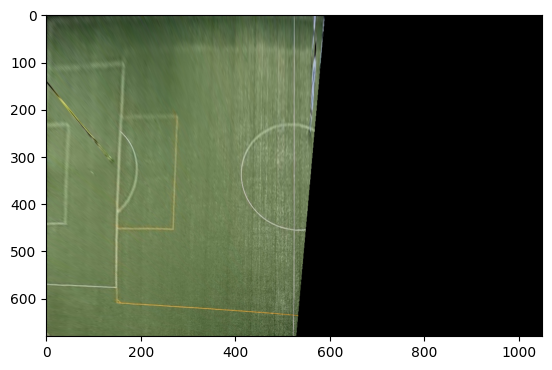

In [52]:
left_borders = np.array([
    [672, 863],
    [1468,557],
    [2344,364],
    [2358, 467],
], dtype=np.float32)

right_borders = np.array([
    [2197,808],
    [1267,535],
    [535,434],
    [534,523],
], dtype=np.float32)

M = cv2.getPerspectiveTransform(left_borders, np.array([
    [0,68],
    [0,0],
    [52.5, 0],
    [52.5, 34],
], dtype=np.float32)*10)

warpped = cv2.warpPerspective(img_left, M, (1050, 680))
plt.imshow(warpped);

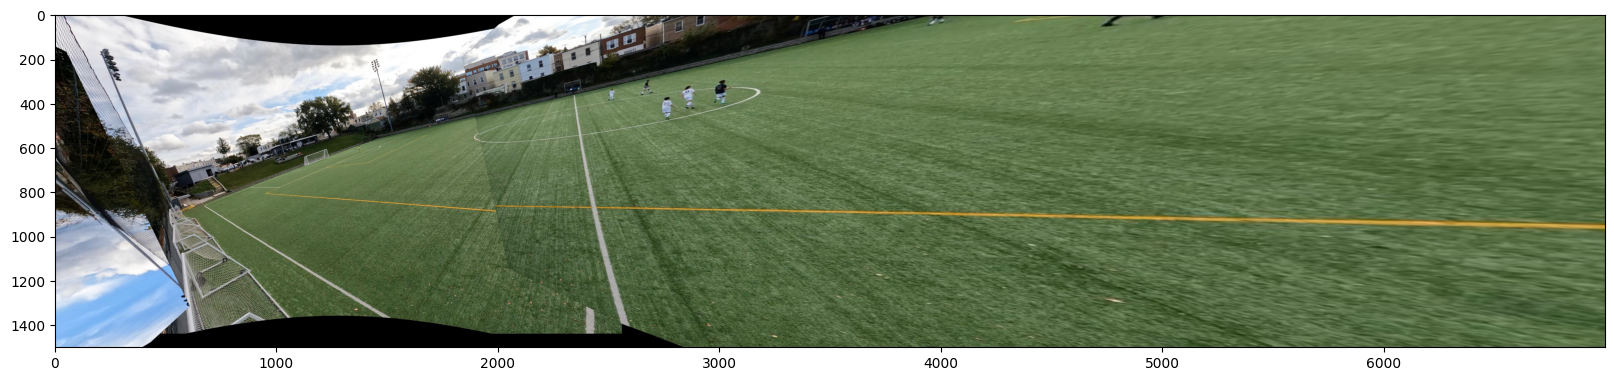

In [67]:
right_borders_virtual = np.array([
    [105,68],
    [105,0],
    [52.5,0],
    [52.5,34],
], dtype=np.float32) * 10

pts_reshaped = right_borders_virtual.reshape(-1, 1, 2)
right_extrapolation = cv2.perspectiveTransform(pts_reshaped, np.linalg.inv(M))

stitch(right_extrapolation, right_borders, img_left, img_right)

Stitching succeeded!


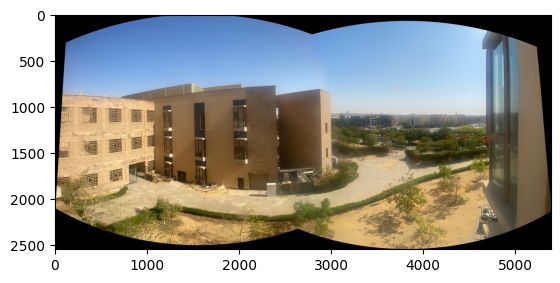

In [90]:
img_left = cv2.imread('data/left_building.jpeg')
img_right = cv2.imread('data/right_building.jpeg')

stitch_cv2(img_left, img_right)

In [ ]:
img_left = cv2.imread('data/left_street.jpeg')
img_right = cv2.imread('data/right_street.jpeg')

stitch_cv2(img_left, img_right)

Stitching failed. Error code: 3


Stitching succeeded!


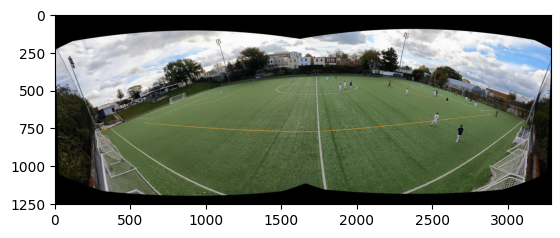

In [92]:
img_left = cv2.imread('data/left_soccer.jpeg')
img_right = cv2.imread('data/right_soccer.jpeg')

stitch_cv2(img_left, img_right)